Nama : Raafi Nur Adzani   
NIM  : A11.2021.13536

# Mengimport Library 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

1. Library 'numpy' digunakan untuk komputasi numerik
2. Library 'matplotlib' digunakan untuk visualisasi data
3. Library 'pandas' digunakan untuk memanipulasi dan analisis data

# Mengimport Dataset

In [10]:
data = pd.read_csv('latihan_interval_lari.csv')

tampung data csv 'Latihan_interval_lari.csv' dalam variable 'data'

In [11]:
X = data.iloc[:, [1, 2]].values
y = data.iloc[:, -1].values

Ambill nilai dari dataset yang di-import sebelumnya, dengan mengambil kolom ke-2 dan ke-3 sebagai nilai fitur (X), dan kolom terakhir sebagai nilai target (y). Nama variabel X dan y bisa berbeda tergantung pada kebutuhan.

# Membagi Dataset menjadi Training Set dan Test Set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

Bagi data menjadi data latih (train) dan data uji (test) dengan menggunakan fungsi train_test_split dari library Scikit-learn. Data latih dan data uji terdiri dari atribut (X) dan label (y) yang telah diambil sebelumnya.

# Menggunakan Scaling

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Sklearn.preprocessing.StandardScaler digunakan untuk standarisasi fitur dengan menghapus mean dan scaling ke unit variance. Kode tersebut dijalankan pada X_train dan X_test sehingga kedua set data diubah sedemikian rupa sehingga semua fitur memiliki mean = 0 dan variansi = 1.

# Naive Bayes

In [5]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

Import Naive Bayes Gaussian dari modul sklearn dan menginisialisasi model klasifikasi dengan GaussianNB(). Kemudian model dilatih dengan memanggil metode fit() dengan parameter input X_train dan output y_

# Prediksi Tes Set

In [6]:
y_pred = classifier.predict(X_test)

Kode tersebut digunakan untuk melakukan prediksi target variabel pada data test (X_test) dengan menggunakan model klasifikasi yang sudah dilatih sebelumnya (classifier).

# Membuat Perhitungan Confusion Matriks

In [7]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[3 2]
 [0 4]]


Confusion Matriks befungsi untuk menghitung hasil prediksi y_pred dan nilai sebenarnya y_test pada data uji. Confusion matriks akan menunjukkan jumlah data yang benar diprediksi dan salah diprediksi untuk masing-masing kelas pada data uji.

#  Memvisualisasikan Data Dengan Matplotlib

## 1. Train Set

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


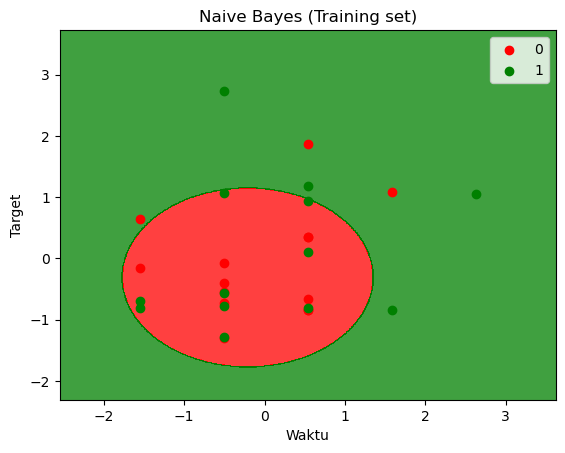

In [8]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Waktu')
plt.ylabel('Target')
plt.legend()
plt.show()

## 2. Test Set

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


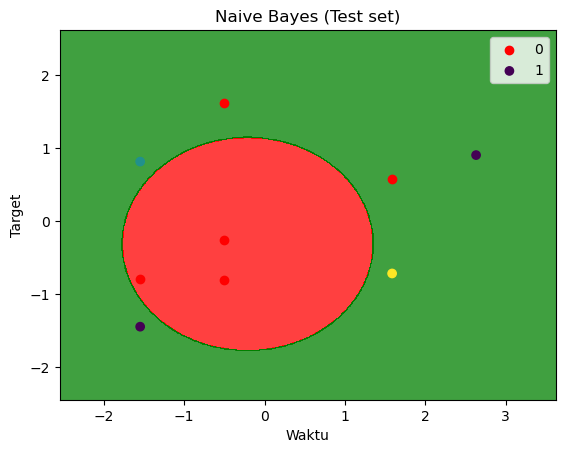

In [9]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Waktu')
plt.ylabel('Target')
plt.legend()
plt.show()

Visualisasikan hasil prediksi pada train set dan tes set menggunakan model Naive Bayes. Pertama, kode membuat meshgrid yang terdiri dari dua variabel independen dari data set. Kemudian, model Naive Bayes akan digunakan untuk memprediksi nilai target pada setiap titik pada meshgrid dan plot akan dibuat dengan warna yang berbeda untuk setiap kelas target. Akhirnya, plot akan ditampilkan dengan menambahkan label pada sumbu x dan y dan membuat legenda.